<a href="https://colab.research.google.com/github/rsha0812/EVA4-S9-/blob/master/EVA4S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
from datafile import *
from Resnet_18 import *
from model1 import *
from GradCam import *
import torch.nn as nn
import torch.nn.functional as F
from trainingfile import *

In [2]:
trainloader, testloader, classes = getData()

Files already downloaded and verified
Files already downloaded and verified


In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

cuda


In [4]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [5]:
Training(30, model, device, trainloader, testloader)
ClassTestAccuracy(testloader, device, model, classes)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.711390733718872 Batch_id=390 Accuracy=37.46: 100%|██████████| 391/391 [01:08<00:00,  6.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.0730, Accuracy: 4144/10000 (41.44%)

EPOCH: 1


Loss=1.609325647354126 Batch_id=390 Accuracy=50.03: 100%|██████████| 391/391 [01:08<00:00,  6.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.8020, Accuracy: 5321/10000 (53.21%)

EPOCH: 2


Loss=1.087712049484253 Batch_id=390 Accuracy=57.09: 100%|██████████| 391/391 [01:08<00:00,  6.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.6369, Accuracy: 5920/10000 (59.20%)

EPOCH: 3


Loss=1.0053761005401611 Batch_id=390 Accuracy=61.95: 100%|██████████| 391/391 [01:09<00:00,  6.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.8989, Accuracy: 6122/10000 (61.22%)

EPOCH: 4


Loss=0.9862746000289917 Batch_id=390 Accuracy=65.55: 100%|██████████| 391/391 [01:08<00:00,  6.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.2633, Accuracy: 6460/10000 (64.60%)

EPOCH: 5


Loss=1.0246286392211914 Batch_id=390 Accuracy=68.06: 100%|██████████| 391/391 [01:08<00:00,  6.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.6109, Accuracy: 6643/10000 (66.43%)

EPOCH: 6


Loss=0.6949885487556458 Batch_id=390 Accuracy=73.90: 100%|██████████| 391/391 [01:08<00:00,  6.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.0987, Accuracy: 7259/10000 (72.59%)

EPOCH: 7


Loss=0.7264602184295654 Batch_id=390 Accuracy=75.03: 100%|██████████| 391/391 [01:08<00:00,  6.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.3744, Accuracy: 7342/10000 (73.42%)

EPOCH: 8


Loss=0.6286187767982483 Batch_id=390 Accuracy=75.90: 100%|██████████| 391/391 [01:08<00:00,  6.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.5185, Accuracy: 7376/10000 (73.76%)

EPOCH: 9


Loss=0.5078460574150085 Batch_id=390 Accuracy=76.56: 100%|██████████| 391/391 [01:08<00:00,  6.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.6722, Accuracy: 7438/10000 (74.38%)

EPOCH: 10


Loss=0.749868631362915 Batch_id=390 Accuracy=77.20: 100%|██████████| 391/391 [01:08<00:00,  6.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.6624, Accuracy: 7483/10000 (74.83%)

EPOCH: 11


Loss=0.5474690198898315 Batch_id=390 Accuracy=77.49: 100%|██████████| 391/391 [01:08<00:00,  6.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.7985, Accuracy: 7528/10000 (75.28%)

EPOCH: 12


Loss=0.55648273229599 Batch_id=390 Accuracy=78.05: 100%|██████████| 391/391 [01:08<00:00,  6.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.8736, Accuracy: 7571/10000 (75.71%)

EPOCH: 13


Loss=0.6129602193832397 Batch_id=390 Accuracy=78.47: 100%|██████████| 391/391 [01:08<00:00,  6.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9261, Accuracy: 7583/10000 (75.83%)

EPOCH: 14


Loss=0.7555760145187378 Batch_id=390 Accuracy=78.59: 100%|██████████| 391/391 [01:08<00:00,  6.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9169, Accuracy: 7573/10000 (75.73%)

EPOCH: 15


Loss=0.569547712802887 Batch_id=390 Accuracy=78.73: 100%|██████████| 391/391 [01:08<00:00,  6.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9537, Accuracy: 7578/10000 (75.78%)

EPOCH: 16


Loss=0.531904399394989 Batch_id=390 Accuracy=78.72: 100%|██████████| 391/391 [01:08<00:00,  6.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9397, Accuracy: 7638/10000 (76.38%)

EPOCH: 17


Loss=0.6304329633712769 Batch_id=390 Accuracy=78.77: 100%|██████████| 391/391 [01:08<00:00,  6.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9786, Accuracy: 7604/10000 (76.04%)

EPOCH: 18


Loss=0.6763521432876587 Batch_id=390 Accuracy=79.03: 100%|██████████| 391/391 [01:08<00:00,  6.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.0046, Accuracy: 7659/10000 (76.59%)

EPOCH: 19


Loss=0.6341501474380493 Batch_id=390 Accuracy=78.98: 100%|██████████| 391/391 [01:08<00:00,  6.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9611, Accuracy: 7585/10000 (75.85%)

EPOCH: 20


Loss=0.5653712749481201 Batch_id=390 Accuracy=78.84: 100%|██████████| 391/391 [01:08<00:00,  6.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9812, Accuracy: 7611/10000 (76.11%)

EPOCH: 21


Loss=0.5475839376449585 Batch_id=390 Accuracy=78.90: 100%|██████████| 391/391 [01:08<00:00,  6.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.0079, Accuracy: 7643/10000 (76.43%)

EPOCH: 22


Loss=0.7784063220024109 Batch_id=390 Accuracy=78.73: 100%|██████████| 391/391 [01:08<00:00,  6.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.0003, Accuracy: 7591/10000 (75.91%)

EPOCH: 23


Loss=0.4815470576286316 Batch_id=390 Accuracy=78.62: 100%|██████████| 391/391 [01:09<00:00,  6.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9283, Accuracy: 7575/10000 (75.75%)

EPOCH: 24


Loss=0.5956498384475708 Batch_id=390 Accuracy=78.85: 100%|██████████| 391/391 [01:08<00:00,  6.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9935, Accuracy: 7599/10000 (75.99%)

EPOCH: 25


Loss=0.7751792073249817 Batch_id=390 Accuracy=78.98: 100%|██████████| 391/391 [01:08<00:00,  6.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9779, Accuracy: 7580/10000 (75.80%)

EPOCH: 26


Loss=0.6827901601791382 Batch_id=390 Accuracy=79.00: 100%|██████████| 391/391 [01:08<00:00,  6.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9601, Accuracy: 7622/10000 (76.22%)

EPOCH: 27


Loss=0.7880556583404541 Batch_id=390 Accuracy=78.88: 100%|██████████| 391/391 [01:08<00:00,  6.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9508, Accuracy: 7650/10000 (76.50%)

EPOCH: 28


Loss=0.643135130405426 Batch_id=390 Accuracy=78.79: 100%|██████████| 391/391 [01:08<00:00,  6.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.0236, Accuracy: 7635/10000 (76.35%)

EPOCH: 29


Loss=0.5581299066543579 Batch_id=390 Accuracy=78.94: 100%|██████████| 391/391 [01:08<00:00,  6.32it/s]



Test set: Average loss: -5.9660, Accuracy: 7637/10000 (76.37%)

Accuracy of plane : 95 %
Accuracy of   car : 96 %
Accuracy of  bird : 68 %
Accuracy of   cat : 62 %
Accuracy of  deer : 73 %
Accuracy of   dog : 78 %
Accuracy of  frog : 88 %
Accuracy of horse : 81 %
Accuracy of  ship : 87 %
Accuracy of truck : 86 %


In [15]:
from GradCam import show_map
import matplotlib.pyplot as plt
heat_map, result = show_map()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


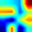

In [16]:
transforms.ToPILImage()(heat_map)

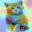

In [17]:
transforms.ToPILImage()(result)